In [54]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.decomposition import PCA

In [2]:
#Load the data set
#top 30 cyptocurrencies on yahoo api. columns represent stock prices on ADJ close. Load the CCI30 Index on Close
stock_prices = pd.read_csv('./Data/Yahoo_Stock_Prices.csv')
CCI30 = pd.read_csv('./Data/cci30_OHLCV.csv')

In [3]:
stock_prices.set_index('Date', inplace = True)
stock_prices

,AAVE-USD,ADA-USD,ALGO-USD,AMP1-USD,BCH-USD,BNB-USD,BTC-USD,CRO-USD,DOGE-USD,DOT1-USD,...,SOL1-USD,THETA-USD,TRX-USD,UNI3-USD,USDC-USD,USDT-USD,VET-USD,XLM-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,314.248993,NaN,0.000183,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005493,0.465760,0.024390
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,315.032013,NaN,0.000186,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005481,0.459137,0.024318
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,281.082001,NaN,0.000167,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004672,0.461172,0.022106
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,264.195007,NaN,0.000158,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004416,0.417234,0.018928
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,274.473999,NaN,0.000161,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004947,0.421412,0.020316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-28,320.381165,1.511987,0.898697,0.036657,689.947876,329.879913,35697.605469,0.113855,0.311205,21.410093,...,29.039276,6.564076,0.072087,25.924946,1.000196,1.000481,0.108300,0.398792,262.820526,0.900148
2021-05-29,297.899628,1.406232,0.829413,0.033361,651.579956,305.052155,34616.066406,0.111285,0.303110,19.863375,...,27.376421,6.313582,0.068783,23.179464,0.999901,1.000392,0.098990,0.367157,242.684479,0.831788
2021-05-30,325.148407,1.577279,0.850180,0.037683,663.512024,325.784027,35678.128906,0.112185,0.302224,20.473988,...,28.602659,6.545633,0.072036,25.742519,0.999498,1.000063,0.107572,0.375688,262.333740,0.906609


In [5]:
#Set Index as Date and filter data to just include Closing price
CCI30.set_index('Date', inplace = True)
CCI30 = pd.DataFrame(CCI30['Close'])

In [12]:
stock_prices.mean()

AAVE-USD      417.460325
ADA-USD         0.225117
ALGO-USD        0.477715
AMP1-USD        0.047612
BCH-USD       536.977939
BNB-USD        45.298979
BTC-USD      7918.957640
CRO-USD         0.074266
DOGE-USD        0.011785
DOT1-USD       18.915649
EOS-USD         4.627645
ETC-USD        10.916023
ETH-USD       352.090670
FIL-USD        15.541560
HEX-USD         0.007625
ICP1-USD      131.643737
LINK-USD        5.892775
LTC-USD        58.369481
MATIC-USD       0.114451
SHIB-USD        0.000002
SOL1-USD        8.740041
THETA-USD       1.016259
TRX-USD         0.031663
UNI3-USD       33.090125
USDC-USD        1.004170
USDT-USD        1.000792
VET-USD         0.021065
XLM-USD         0.104724
XMR-USD        78.466877
XRP-USD         0.275894
dtype: float64

In [17]:
stock_prices.groupby(pd.to_datetime(stock_prices.index).year).mean()

,AAVE-USD,ADA-USD,ALGO-USD,AMP1-USD,BCH-USD,BNB-USD,BTC-USD,CRO-USD,DOGE-USD,DOT1-USD,...,SOL1-USD,THETA-USD,TRX-USD,UNI3-USD,USDC-USD,USDT-USD,VET-USD,XLM-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,272.453381,NaN,0.000143,NaN,...,NaN,NaN,NaN,NaN,NaN,0.998785,NaN,0.002801,0.490609,0.008864
2016,NaN,NaN,NaN,NaN,NaN,NaN,568.492407,NaN,0.000235,NaN,...,NaN,NaN,NaN,NaN,NaN,0.999743,NaN,0.001999,3.688392,0.006894
2017,NaN,0.126531,NaN,NaN,891.289926,1.967558,4006.033629,NaN,0.001601,NaN,...,NaN,NaN,0.008502,NaN,NaN,0.999716,NaN,0.033938,75.902369,0.203841
2018,NaN,0.209573,NaN,NaN,865.524993,11.172537,7572.298947,0.022896,0.004350,NaN,...,NaN,0.126930,0.041275,NaN,1.012622,1.000030,0.010270,0.283843,168.043560,0.666274
2019,NaN,0.055499,0.248804,NaN,261.375074,20.092979,7395.246282,0.044579,0.002563,NaN,...,NaN,0.103334,0.022535,NaN,1.005237,1.004853,0.005469,0.087798,66.491372,0.309701
2020,NaN,0.086775,0.283908,NaN,270.546132,21.296178,11125.798836,0.093543,0.002746,4.823883,...,1.554462,0.361457,0.020695,NaN,1.002465,1.001334,0.010054,0.082526,84.657111,0.258625
2021,417.460325,1.058896,1.066812,0.047612,666.748614,290.551492,47828.629677,0.176890,0.153536,29.484473,...,19.991145,6.796960,0.073381,33.090125,1.000293,1.000717,0.094810,0.430200,250.841968,0.760377


In [16]:
CCI30.groupby(pd.to_datetime(CCI30.index).year).mean()

,Close
Date,
2015,81.790556
2016,212.644912
2017,3091.841871
2018,6727.370247
2019,3130.473096
2020,4165.270000
2021,19172.878733


In [22]:
stock_prices

,AAVE-USD,ADA-USD,ALGO-USD,AMP1-USD,BCH-USD,BNB-USD,BTC-USD,CRO-USD,DOGE-USD,DOT1-USD,...,SOL1-USD,THETA-USD,TRX-USD,UNI3-USD,USDC-USD,USDT-USD,VET-USD,XLM-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,314.248993,NaN,0.000183,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005493,0.465760,0.024390
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,315.032013,NaN,0.000186,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005481,0.459137,0.024318
2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,281.082001,NaN,0.000167,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004672,0.461172,0.022106
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,264.195007,NaN,0.000158,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004416,0.417234,0.018928
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,274.473999,NaN,0.000161,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004947,0.421412,0.020316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-28,320.381165,1.511987,0.898697,0.036657,689.947876,329.879913,35697.605469,0.113855,0.311205,21.410093,...,29.039276,6.564076,0.072087,25.924946,1.000196,1.000481,0.108300,0.398792,262.820526,0.900148
2021-05-29,297.899628,1.406232,0.829413,0.033361,651.579956,305.052155,34616.066406,0.111285,0.303110,19.863375,...,27.376421,6.313582,0.068783,23.179464,0.999901,1.000392,0.098990,0.367157,242.684479,0.831788
2021-05-30,325.148407,1.577279,0.850180,0.037683,663.512024,325.784027,35678.128906,0.112185,0.302224,20.473988,...,28.602659,6.545633,0.072036,25.742519,0.999498,1.000063,0.107572,0.375688,262.333740,0.906609


<AxesSubplot:xlabel='Date'>

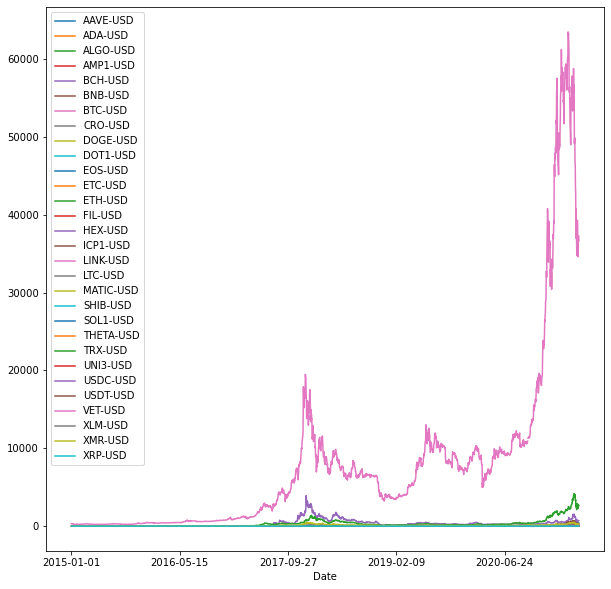

In [34]:
#Plot Stock Prices Data
plt.rcParams["figure.figsize"] = (10,10)
stock_prices.pivot_table(index=stock_prices.index,values=stock_prices.columns).plot()

Unsurprisingly,the purple line that is bitcoin dominates closing price over the years


In [46]:
CCI30.sort_index(inplace=True)

<AxesSubplot:xlabel='Date'>

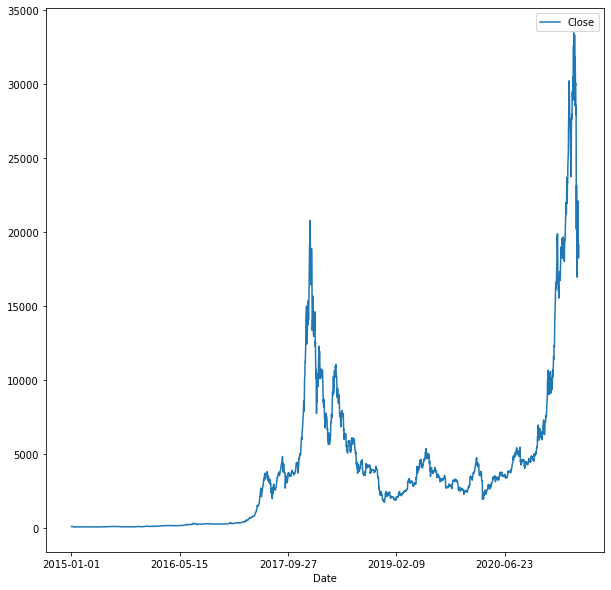

In [51]:
#plot CCI30 data
plt.rcParams["figure.figsize"] = (10,10)
CCI30.plot( y='Close')

This graph looks identical to the Bitcoin line in the stock prices data

We can already see that Bitcoin has a strong relationship to the CCI30 index. Lets now explore how many other stocks help to explain the entire CCi30 index

## PCA Analysis 


In [55]:
stock_price_PCA = PCA().fit(stock_prices)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').